In [394]:
#Imports libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import random as rd

from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score, accuracy_score, recall_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [395]:
import sklearn as sk

In [396]:
dataset = pd.read_csv("penguins.csv") #Reads datas

In [397]:
#Dataset head
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Data set head, some points have NaN values.

In [398]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


There are 8 variables. Four of them are float-type (bill length, flipper length, bill depth, and body mass), 1 is integer-type (year), and 3 are string (species, island, sex). Species is the output variable. There are 344 indexed instances overall.

In [399]:
species = dataset["species"].values


In [400]:
#Before cleaning summary statistics
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [401]:
#After cleaning, summary statistics
dataset_clean = dataset.boxpl
dataset_clean.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


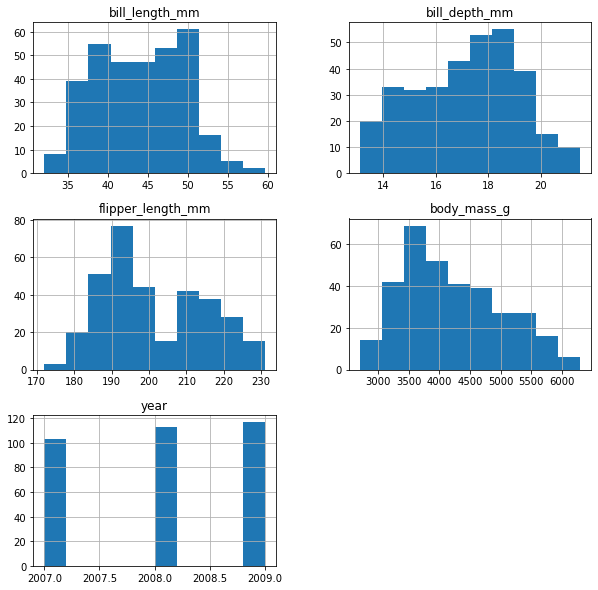

In [402]:
%matplotlib inline  
# Histograms of numerical type variables
import matplotlib.pyplot as plt
dataset_clean.hist(bins = 10, figsize = (10,10))
plt.show()

Body mass seems a little right-skewed, as does flipper length. The year data is roughly balanced. 

<AxesSubplot:>

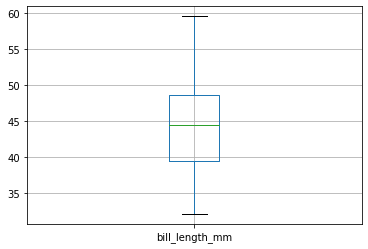

In [403]:
dataset_clean.boxplot(column=['bill_length_mm']) #Bill length boxplot

<AxesSubplot:>

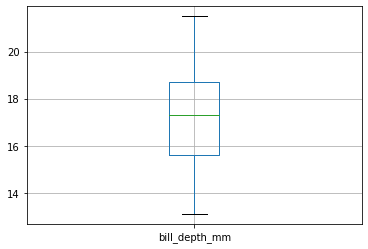

In [404]:
dataset_clean.boxplot(column=['bill_depth_mm']) #Bill depth boxplot

<AxesSubplot:>

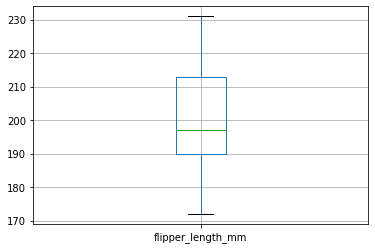

In [405]:
dataset_clean.boxplot(column=['flipper_length_mm']) #Flipper length boxplot

<AxesSubplot:>

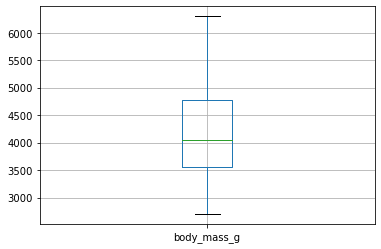

In [406]:
dataset_clean.boxplot(column=['body_mass_g']) #Body mass box plot

In [407]:
corr_matrix = dataset_clean.corr() #correlation matrix
corr_matrix


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


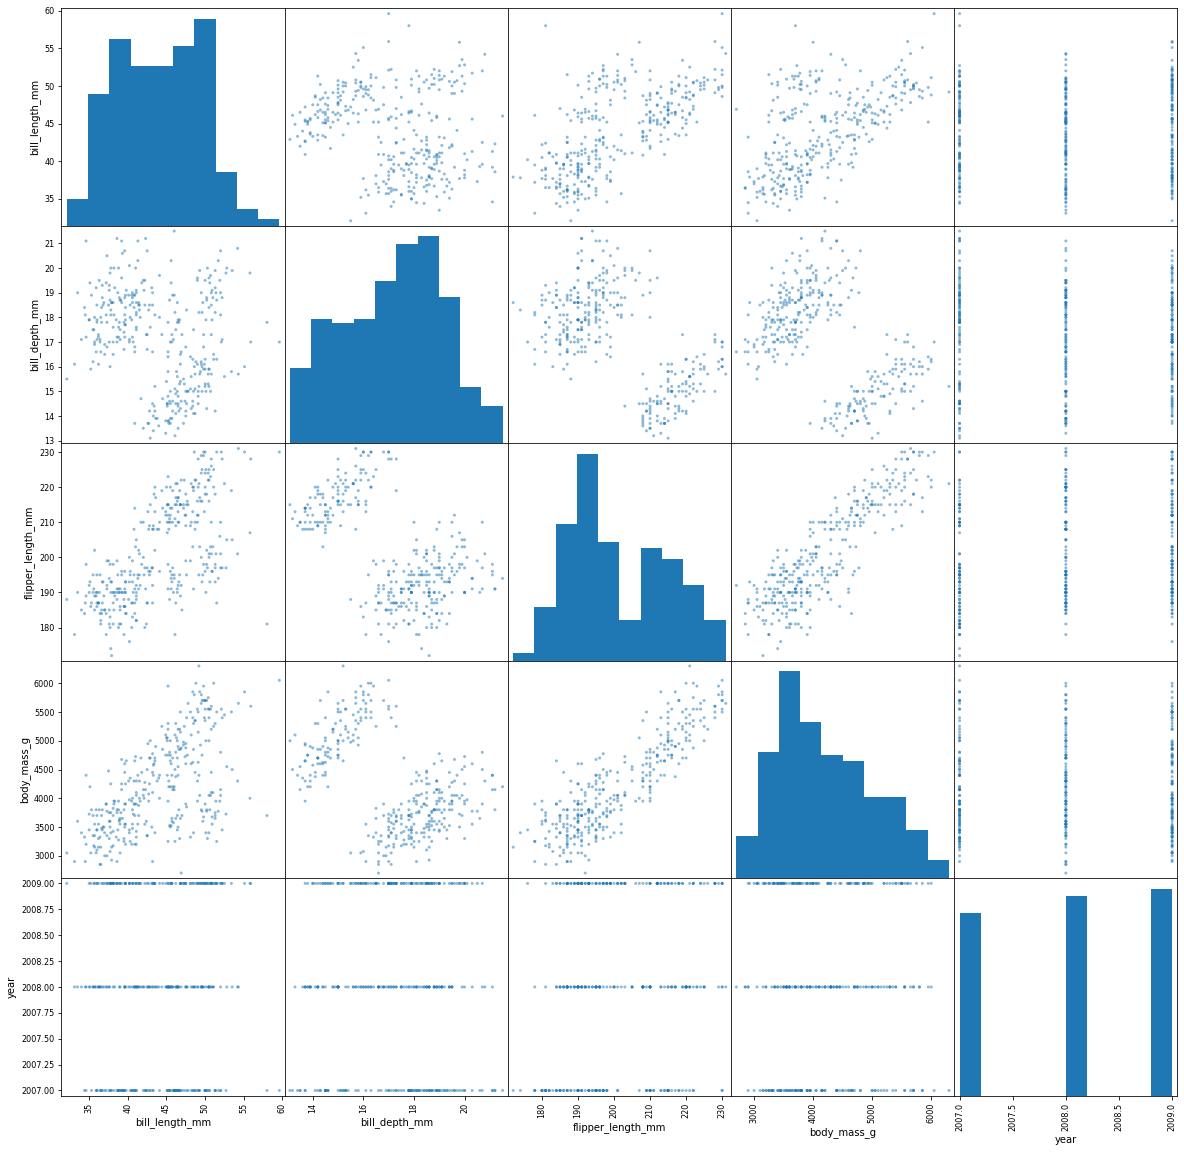

In [477]:
from pandas.plotting import scatter_matrix #Scatter matrix
scatter_matrix(dataset_clean, figsize=(20, 20))
plt.savefig('Scattermatrix.png')

There seems to be a positive correlation between body mass and flipper length and some amount between body mass and bill length. Some correlations seem to be separated into groups with individual correlations that generally appear positve within that group. The year variable does not appear to have much significance.

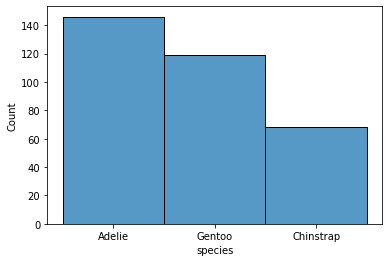

In [409]:
#Target variable species histogram
sns.histplot(data = dataset_clean, x = 'species')
plt.savefig('specieshist.png')

The dataset is unbalanced. In particular there are significantly less Chinstrap penguins than other species.  

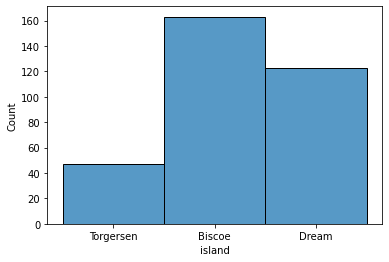

In [410]:
#Island historam
sns.histplot(data = dataset_clean, x = 'island')
plt.savefig('islandhist.png')

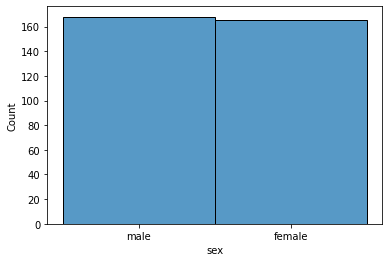

In [411]:
#sex histogram
sns.histplot(data = dataset_clean, x = 'sex')
plt.savefig('sexhist.png')

In [412]:
dataset_clean

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [413]:
data_array = np.array(dataset_clean.iloc[:,:].values) #Make dataset into an array
data_array[0] #Example


array(['Adelie', 'Torgersen', 39.1, 18.7, 181.0, 3750.0, 'male', 2007],
      dtype=object)

In [414]:
dataset_clean.iloc[:,0].values #Target variable list (ordered)


array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

In [415]:
data_array #Total initial array

array([['Adelie', 'Torgersen', 39.1, ..., 3750.0, 'male', 2007],
       ['Adelie', 'Torgersen', 39.5, ..., 3800.0, 'female', 2007],
       ['Adelie', 'Torgersen', 40.3, ..., 3250.0, 'female', 2007],
       ...,
       ['Chinstrap', 'Dream', 49.6, ..., 3775.0, 'male', 2009],
       ['Chinstrap', 'Dream', 50.8, ..., 4100.0, 'male', 2009],
       ['Chinstrap', 'Dream', 50.2, ..., 3775.0, 'female', 2009]],
      dtype=object)

In [416]:
rd.seed(62) #Creates random array for randominzing dataset rows for cross validation
C = 0
rand_rows = np.zeros((np.shape(dataset_clean)[0]))
while(C < np.shape(dataset_clean)[0]-1):
    randint = rd.randint(0, np.shape(dataset_clean)[0]-1)
    #print(randint)
    if (randint not in rand_rows):
        rand_rows[C] = randint
        C+=1

In [417]:
rand_rows = np.array(rand_rows, dtype=int) #makes iteger type

In [418]:
rand_data = data_array[rand_rows] #randomizes data

In [419]:
rand_data_num = np.array(rand_data) #intializes array which will have string replaced by numbers

In [420]:
rand_data #Now random

array([['Chinstrap', 'Dream', 52.8, ..., 4550.0, 'male', 2008],
       ['Adelie', 'Dream', 36.2, ..., 3300.0, 'female', 2008],
       ['Adelie', 'Dream', 37.6, ..., 3300.0, 'female', 2007],
       ...,
       ['Adelie', 'Biscoe', 40.1, ..., 4300.0, 'male', 2008],
       ['Chinstrap', 'Dream', 45.4, ..., 3525.0, 'female', 2007],
       ['Adelie', 'Torgersen', 39.1, ..., 3750.0, 'male', 2007]],
      dtype=object)

In [421]:
rowlen = np.shape(rand_data)[0]
#There are 3 variables that are string-type, want to make integer, replaces strings with numbers
for i in range(rowlen):
    #Replace species names: 'Adelie' with 0, "Gentoo" with 1, "Chinstrap" with 2
    if(rand_data[i, 0] == 'Adelie'):
        rand_data_num[i, 0] = 0
    elif(rand_data[i, 0] == 'Gentoo'):
        rand_data_num[i, 0] = 1
    else:
        rand_data_num[i, 0] = 2
    
    #Replace island names: 'Torgersen' with 0, "Biscoe" with 1, "Dream" with 2
    if(rand_data[i, 1] == 'Torgersen'):
        rand_data_num[i, 1] = 0
    elif(rand_data[i, 1] == 'Biscoe'):
        rand_data_num[i, 1] = 1
    else:
        rand_data_num[i, 1] = 2
        
    #Replace sex: 'male' with 0, 'female' with 1 
    if(rand_data[i, 6] == 'male'):
        rand_data_num[i, 6] = 0
    else: rand_data_num[i, 6] = 1

In [422]:
peng_y = rand_data_num[:, 0] #Output Y, penguin species
feat_x = rand_data_num[:, 1:] #Features X


In [423]:
np.shape(peng_y) #Number os data points

(333,)

In [424]:
#Validation set for cross validation, makes everything float for consistency
peng_y_train = np.array(peng_y[:167], dtype=float)
peng_y_test = np.array(peng_y[167:], dtype=float)
feat_x_train = np.array(feat_x[:167, :], dtype=float)
feat_x_test = np.array(feat_x[167:, :], dtype=float)

MODEL TESTING

KNN Nearest Neighbors

In [425]:
#KNN training k = 7
knn_7 = KNeighborsClassifier(n_neighbors = 7)
knn_7.fit(feat_x_train, peng_y_train)
peng_pred_KNN_7_train = knn_7.predict(feat_x_train)
f1_KNN_7_train=f1_score(peng_y_train, peng_pred_KNN_7_train, average = 'macro'),
accKNN_7_train=accuracy_score(peng_y_train, peng_pred_KNN_7_train),
recall_KNN_7_train = recall_score(peng_y_train, peng_pred_KNN_7_train, average='macro')
precKNN_7_train = precision_score(peng_y_train, peng_pred_KNN_7_train, average='macro')
comKNN_7_train = confusion_matrix(peng_y_train, peng_pred_KNN_7_train)
recall_KNN_7_train, precKNN_7_train, accKNN_7_train, f1_KNN_7_train,  comKNN_7_train

(0.7328052484302484,
 0.8205226703917118,
 (0.7964071856287425,),
 (0.736413180602513,),
 array([[59,  5,  2],
        [ 3, 61,  0],
        [21,  3, 13]]))

In [426]:
#KNN test k=7
peng_pred_KNN_7_test = knn_7.predict(feat_x_test)
f1_KNN_7_test=f1_score(peng_y_test, peng_pred_KNN_7_test, average = 'macro'),
accKNN_7_test=accuracy_score(peng_y_test, peng_pred_KNN_7_test),
recall_KNN_7_test = recall_score(peng_y_test, peng_pred_KNN_7_test, average='macro')
precKNN_7_test = precision_score(peng_y_test, peng_pred_KNN_7_test, average='macro')
comKNN_7_test = confusion_matrix(peng_y_test, peng_pred_KNN_7_test)

In [427]:
#Test data perfomrance KNN k =7
recall_KNN_7_test, precKNN_7_test, accKNN_7_test, f1_KNN_7_test,  comKNN_7_test

((0.7085790335790336,),
 (0.7891566265060241,),
 array([[71,  4,  5],
        [ 4, 51,  0],
        [21,  1,  9]]),
 0.7643849206349206,
 0.7016984359726295)

In [461]:
#KNN training k = 5
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_5.fit(feat_x_train, peng_y_train)
peng_pred_KNN_5_train = knn_5.predict(feat_x_train)
f1_KNN_5_train=f1_score(peng_y_train, peng_pred_KNN_5_train, average = 'macro'),
accKNN_5_train=accuracy_score(peng_y_train, peng_pred_KNN_5_train),
recall_KNN_5_train = recall_score(peng_y_train, peng_pred_KNN_5_train, average='macro')
precKNN_5_train = precision_score(peng_y_train, peng_pred_KNN_5_train, average='macro')
comKNN_5_train = confusion_matrix(peng_y_train, peng_pred_KNN_5_train)
f1_KNN_5_train, accKNN_5_train, comKNN_5_train, precKNN_5_train, recall_KNN_5_train

((0.8064580228514654,),
 (0.8383233532934131,),
 array([[59,  3,  4],
        [ 3, 61,  0],
        [15,  2, 20]]),
 0.8412698412698413,
 0.7958683114933116)

In [429]:
#KNN test k=5
peng_pred_KNN_5_test = knn_5.predict(feat_x_test)
f1_KNN_5_test=f1_score(peng_y_test, peng_pred_KNN_5_test, average = 'macro'),
accKNN_5_test=accuracy_score(peng_y_test, peng_pred_KNN_5_test),
recall_KNN_5_test = recall_score(peng_y_test, peng_pred_KNN_5_test, average='macro')
precKNN_5_test = precision_score(peng_y_test, peng_pred_KNN_5_test, average='macro')
comKNN_5_test = confusion_matrix(peng_y_test, peng_pred_KNN_5_test)

In [462]:
f1_KNN_5_test, accKNN_5_test, comKNN_5_test, precKNN_5_test, recall_KNN_5_test

((0.7483261341359494,),
 (0.8012048192771084,),
 array([[70,  3,  7],
        [ 5, 50,  0],
        [18,  0, 13]]),
 0.7820281328193683,
 0.7344819159335289)

Logistic Regression

In [431]:
#With no feature selection
log_reg = skl_lm.LogisticRegression(solver = 'newton-cg', penalty = 'none')#, max_iter = 1000)
log_reg.fit(feat_x_train, peng_y_train)
print(log_reg)
print('classes: ',log_reg.classes_)
print('coefficients: ',log_reg.coef_)
print('intercept :', log_reg.intercept_)

LogisticRegression(penalty='none', solver='newton-cg')
classes:  [0. 1. 2.]
coefficients:  [[-5.77382822e+00 -4.57455085e+00  6.77887841e+00 -2.08480727e-01
   1.05516832e-02 -3.62086837e-01  4.77272079e-02]
 [-2.45379600e-01 -6.66297078e-01 -5.03609123e+00  5.71756506e-01
   2.04574492e-02  9.21531063e-01 -4.16050817e-02]
 [ 6.01920782e+00  5.24084791e+00 -1.74278719e+00 -3.63275859e-01
  -3.10106070e-02 -5.59444227e-01 -6.12298722e-03]]
intercept : [ 0.00229216  0.00045011 -0.00274228]


In [464]:
#LogReg training
peng_pred_logreg_train = log_reg.predict(feat_x_train)
f1_logreg_train=f1_score(peng_y_train, peng_pred_logreg_train, average = 'macro'),
acc_logreg_train=accuracy_score(peng_y_train, peng_pred_logreg_train),
recall_logreg_train = recall_score(peng_y_train, peng_pred_logreg_train, average='macro')
prec_logreg_train = precision_score(peng_y_train, peng_pred_logreg_train, average='macro')
com_logreg_train = confusion_matrix(peng_y_train, peng_pred_logreg_train)
f1_logreg_train, acc_logreg_train, com_logreg_train, prec_logreg_train, recall_logreg_train

((1.0,),
 (1.0,),
 array([[66,  0,  0],
        [ 0, 64,  0],
        [ 0,  0, 37]]),
 1.0,
 1.0)

In [465]:
#LogReg test
peng_pred_logreg_test = log_reg.predict(feat_x_test)
f1_logreg_test=f1_score(peng_y_test, peng_pred_logreg_test, average = 'macro'),
acc_logreg_test=accuracy_score(peng_y_test, peng_pred_logreg_test),
recall_logreg_test = recall_score(peng_y_test, peng_pred_logreg_test, average='macro')
prec_logreg_test = precision_score(peng_y_test, peng_pred_logreg_test, average='macro')
com_logreg_test = confusion_matrix(peng_y_test, peng_pred_logreg_test)
f1_logreg_test, acc_logreg_test, com_logreg_test, prec_logreg_test, recall_logreg_test

((1.0,),
 (1.0,),
 array([[80,  0,  0],
        [ 0, 55,  0],
        [ 0,  0, 31]]),
 1.0,
 1.0)

In [434]:
#With Lasso Regression L1, C is the inverse of regularization strength, C=1.0
log_regL1 = skl_lm.LogisticRegression(solver = 'liblinear', penalty = 'l1',  max_iter = 1000)
log_regL1.fit(feat_x_train, peng_y_train)
print(log_regL1)
print('classes: ',log_reg.classes_)
print('coefficients: ',log_reg.coef_)
print('intercept :', log_reg.intercept_)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')
classes:  [0. 1. 2.]
coefficients:  [[-5.77382822e+00 -4.57455085e+00  6.77887841e+00 -2.08480727e-01
   1.05516832e-02 -3.62086837e-01  4.77272079e-02]
 [-2.45379600e-01 -6.66297078e-01 -5.03609123e+00  5.71756506e-01
   2.04574492e-02  9.21531063e-01 -4.16050817e-02]
 [ 6.01920782e+00  5.24084791e+00 -1.74278719e+00 -3.63275859e-01
  -3.10106070e-02 -5.59444227e-01 -6.12298722e-03]]
intercept : [ 0.00229216  0.00045011 -0.00274228]


In [466]:
#LogregL1 training
peng_pred_logregL1_train = log_regL1.predict(feat_x_train)
f1_logregL1_train=f1_score(peng_y_train, peng_pred_logregL1_train, average = 'macro'),
acc_logregL1_train=accuracy_score(peng_y_train, peng_pred_logregL1_train),
recall_logregL1_train = recall_score(peng_y_train, peng_pred_logregL1_train, average='macro')
preclogregL1_train = precision_score(peng_y_train, peng_pred_logregL1_train, average='macro')
com_logregL1_train = confusion_matrix(peng_y_train, peng_pred_logregL1_train)
f1_logregL1_train, acc_logregL1_train, com_logregL1_train, preclogregL1_train, recall_logregL1_train

((1.0,),
 (1.0,),
 array([[66,  0,  0],
        [ 0, 64,  0],
        [ 0,  0, 37]]),
 1.0,
 1.0)

In [467]:
#LogregL1 test
peng_pred_logregL1_test = log_regL1.predict(feat_x_test)
f1_logregL1_test=f1_score(peng_y_test, peng_pred_logregL1_test, average = 'macro'),
acc_logregL1_test=accuracy_score(peng_y_test, peng_pred_logregL1_test),
recall_logregL1_test = recall_score(peng_y_test, peng_pred_logregL1_test, average='macro')
preclogregL1_test = precision_score(peng_y_test, peng_pred_logregL1_test, average='macro')
com_logregL1_test = confusion_matrix(peng_y_test, peng_pred_logregL1_test)
f1_logregL1_test, acc_logregL1_test, com_logregL1_test, preclogregL1_test, recall_logregL1_test

((0.9924651257509419,),
 (0.9939759036144579,),
 array([[80,  0,  0],
        [ 0, 55,  0],
        [ 1,  0, 30]]),
 0.9958847736625515,
 0.989247311827957)

In [437]:
#With Lasso Regula L1, C = .1
log_regL1C0_1 = skl_lm.LogisticRegression(solver = 'liblinear', penalty = 'l1', C = 0.1,  max_iter = 1000)
log_regL1C0_1.fit(feat_x_train, peng_y_train)
print(log_reg)
print('classes: ',log_reg.classes_)
print('coefficients: ',log_reg.coef_)
print('intercept :', log_reg.intercept_)

LogisticRegression(penalty='none', solver='newton-cg')
classes:  [0. 1. 2.]
coefficients:  [[-5.77382822e+00 -4.57455085e+00  6.77887841e+00 -2.08480727e-01
   1.05516832e-02 -3.62086837e-01  4.77272079e-02]
 [-2.45379600e-01 -6.66297078e-01 -5.03609123e+00  5.71756506e-01
   2.04574492e-02  9.21531063e-01 -4.16050817e-02]
 [ 6.01920782e+00  5.24084791e+00 -1.74278719e+00 -3.63275859e-01
  -3.10106070e-02 -5.59444227e-01 -6.12298722e-03]]
intercept : [ 0.00229216  0.00045011 -0.00274228]


In [468]:
#LogregL1 training
peng_pred_logregL1C0_1_train = log_regL1C0_1.predict(feat_x_train)
f1_logregL1C0_1_train=f1_score(peng_y_train, peng_pred_logregL1C0_1_train, average = 'macro'),
acc_logregL1C0_1_train=accuracy_score(peng_y_train, peng_pred_logregL1C0_1_train),
recall_logregL1C0_1_train = recall_score(peng_y_train, peng_pred_logregL1C0_1_train, average='macro')
preclogregL1C0_1_train = precision_score(peng_y_train, peng_pred_logregL1C0_1_train, average='macro')
com_logregL1C0_1_train = confusion_matrix(peng_y_train, peng_pred_logregL1C0_1_train)
f1_logregL1C0_1_train, acc_logregL1C0_1_train, com_logregL1C0_1_train, preclogregL1C0_1_train, recall_logregL1C0_1_train

((0.9929275242901775,),
 (0.9940119760479041,),
 array([[66,  0,  0],
        [ 0, 64,  0],
        [ 1,  0, 36]]),
 0.9950248756218905,
 0.990990990990991)

In [469]:
#LogregL1 test
peng_pred_logregL1C0_1_test = log_regL1C0_1.predict(feat_x_test)
f1_logregL1C0_1_test=f1_score(peng_y_test, peng_pred_logregL1C0_1_test, average = 'macro'),
acc_logregL1C0_1_test=accuracy_score(peng_y_test, peng_pred_logregL1C0_1_test),
recall_logregL1C0_1_test = recall_score(peng_y_test, peng_pred_logregL1C0_1_test, average='macro')
preclogregL1C0_1_test = precision_score(peng_y_test, peng_pred_logregL1C0_1_test, average='macro')
com_logregL1C0_1_test = confusion_matrix(peng_y_test, peng_pred_logregL1C0_1_test)
f1_logregL1C0_1_test, acc_logregL1C0_1_test, com_logregL1C0_1_test, preclogregL1C0_1_test, recall_logregL1C0_1_test

((0.9688814129520605,),
 (0.9759036144578314,),
 array([[80,  0,  0],
        [ 0, 55,  0],
        [ 4,  0, 27]]),
 0.9841269841269842,
 0.956989247311828)

In [440]:
#With Lasso Regularization L1,C = 10
log_regL1C10 = skl_lm.LogisticRegression(solver = 'liblinear', penalty = 'l1', C = 10,  max_iter = 1000)
log_regL1C10.fit(feat_x_train, peng_y_train)
print(log_reg)
print('classes: ',log_reg.classes_)
print('coefficients: ',log_reg.coef_)
print('intercept :', log_reg.intercept_)

LogisticRegression(penalty='none', solver='newton-cg')
classes:  [0. 1. 2.]
coefficients:  [[-5.77382822e+00 -4.57455085e+00  6.77887841e+00 -2.08480727e-01
   1.05516832e-02 -3.62086837e-01  4.77272079e-02]
 [-2.45379600e-01 -6.66297078e-01 -5.03609123e+00  5.71756506e-01
   2.04574492e-02  9.21531063e-01 -4.16050817e-02]
 [ 6.01920782e+00  5.24084791e+00 -1.74278719e+00 -3.63275859e-01
  -3.10106070e-02 -5.59444227e-01 -6.12298722e-03]]
intercept : [ 0.00229216  0.00045011 -0.00274228]


In [441]:
#LogregL1 training
peng_pred_logregL1C10_train = log_regL1C10.predict(feat_x_train)
f1_logregL1C10_train=f1_score(peng_y_train, peng_pred_logregL1C10_train, average = 'macro'),
acc_logregL1C10_train=accuracy_score(peng_y_train, peng_pred_logregL1C10_train),
recall_logregL1C10_train = recall_score(peng_y_train, peng_pred_logregL1C10_train, average='macro')
preclogregL1C10_train = precision_score(peng_y_train, peng_pred_logregL1C10_train, average='macro')
com_logregL1C10_train = confusion_matrix(peng_y_train, peng_pred_logregL1C10_train)
f1_logregL1C10_train, acc_logregL1C10_train, com_logregL1C10_train

((1.0,),
 (1.0,),
 array([[66,  0,  0],
        [ 0, 64,  0],
        [ 0,  0, 37]]))

In [442]:
#LogregL1 test
peng_pred_logregL1C10_test = log_regL1C10.predict(feat_x_test)
f1_logregL1C10_test=f1_score(peng_y_test, peng_pred_logregL1C10_test, average = 'macro'),
acc_logregL1C10_test=accuracy_score(peng_y_test, peng_pred_logregL1C10_test),
recall_logregL1C10_test = recall_score(peng_y_test, peng_pred_logregL1C10_test, average='macro')
preclogregL1C10_test = precision_score(peng_y_test, peng_pred_logregL1C10_test, average='macro')
com_logregL1C10_test = confusion_matrix(peng_y_test, peng_pred_logregL1C10_test)
f1_logregL1C10_test, acc_logregL1C10_test, com_logregL1C10_test

((1.0,),
 (1.0,),
 array([[80,  0,  0],
        [ 0, 55,  0],
        [ 0,  0, 31]]))

In [443]:
#With Rideg regression Regression L2, C is the inverse of regularization strength, C=1.0
log_regL2 = skl_lm.LogisticRegression(solver = 'liblinear', penalty = 'l2', C=1.0,  max_iter = 1000)
log_regL2.fit(feat_x_train, peng_y_train)
print(log_reg)
print('classes: ',log_reg.classes_)
print('coefficients: ',log_reg.coef_)
print('intercept :', log_reg.intercept_)

LogisticRegression(penalty='none', solver='newton-cg')
classes:  [0. 1. 2.]
coefficients:  [[-5.77382822e+00 -4.57455085e+00  6.77887841e+00 -2.08480727e-01
   1.05516832e-02 -3.62086837e-01  4.77272079e-02]
 [-2.45379600e-01 -6.66297078e-01 -5.03609123e+00  5.71756506e-01
   2.04574492e-02  9.21531063e-01 -4.16050817e-02]
 [ 6.01920782e+00  5.24084791e+00 -1.74278719e+00 -3.63275859e-01
  -3.10106070e-02 -5.59444227e-01 -6.12298722e-03]]
intercept : [ 0.00229216  0.00045011 -0.00274228]


In [470]:
#LogregL2 training
peng_pred_logregL2_train = log_regL2.predict(feat_x_train)
f1_logregL2_train=f1_score(peng_y_train, peng_pred_logregL2_train, average = 'macro'),
acc_logregL2_train=accuracy_score(peng_y_train, peng_pred_logregL2_train),
recall_logregL2_train = recall_score(peng_y_train, peng_pred_logregL2_train, average='macro')
preclogregL2_train = precision_score(peng_y_train, peng_pred_logregL2_train, average='macro')
com_logregL2_train = confusion_matrix(peng_y_train, peng_pred_logregL2_train)
f1_logregL2_train, acc_logregL2_train, com_logregL2_train, preclogregL2_train, recall_logregL2_train

((0.9929275242901775,),
 (0.9940119760479041,),
 array([[66,  0,  0],
        [ 0, 64,  0],
        [ 1,  0, 36]]),
 0.9950248756218905,
 0.990990990990991)

In [471]:
#LogregL2 test
peng_pred_logregL2_test = log_regL2.predict(feat_x_test)
f1_logregL2_test=f1_score(peng_y_test, peng_pred_logregL2_test, average = 'macro'),
acc_logregL2_test=accuracy_score(peng_y_test, peng_pred_logregL2_test),
recall_logregL2_test = recall_score(peng_y_test, peng_pred_logregL2_test, average='macro')
preclogregL2_test = precision_score(peng_y_test, peng_pred_logregL2_test, average='macro')
com_logregL2_test = confusion_matrix(peng_y_test, peng_pred_logregL2_test)
f1_logregL2_test, acc_logregL2_test, com_logregL2_test, preclogregL2_test, recall_logregL2_test

((0.9924651257509419,),
 (0.9939759036144579,),
 array([[80,  0,  0],
        [ 0, 55,  0],
        [ 1,  0, 30]]),
 0.9958847736625515,
 0.989247311827957)

LDA

In [446]:
LDA= LinearDiscriminantAnalysis(solver='svd')
LDA.fit(feat_x_train, peng_y_train)
#peng_pred_LDA = lda_clf_A.predict(feat_x_test)

LinearDiscriminantAnalysis()

In [472]:
#LDA training
peng_pred_LDA_train = LDA.predict(feat_x_train)
f1_LDA_train=f1_score(peng_y_train, peng_pred_LDA_train, average = 'macro'),
acc_LDA_train=accuracy_score(peng_y_train, peng_pred_LDA_train),
recall_LDA_train = recall_score(peng_y_train, peng_pred_LDA_train, average='macro')
precLDA_train = precision_score(peng_y_train, peng_pred_LDA_train, average='macro')
com_LDA_train = confusion_matrix(peng_y_train, peng_pred_LDA_train)
f1_LDA_train, acc_LDA_train, com_LDA_train, precLDA_train, recall_LDA_train 

((1.0,),
 (1.0,),
 array([[66,  0,  0],
        [ 0, 64,  0],
        [ 0,  0, 37]]),
 1.0,
 1.0)

In [473]:
#LDA test
peng_pred_LDA_test = LDA.predict(feat_x_test)
f1_LDA_test=f1_score(peng_y_test, peng_pred_LDA_test, average = 'macro'),
acc_LDA_test=accuracy_score(peng_y_test, peng_pred_LDA_test),
recall_LDA_test = recall_score(peng_y_test, peng_pred_LDA_test, average='macro')
precLDA_test = precision_score(peng_y_test, peng_pred_LDA_test, average='macro')
com_LDA_test = confusion_matrix(peng_y_test, peng_pred_LDA_test)
f1_LDA_test, acc_LDA_test, com_LDA_test, precLDA_test, recall_LDA_test

((0.9926125586502944,),
 (0.9939759036144579,),
 array([[79,  0,  1],
        [ 0, 55,  0],
        [ 0,  0, 31]]),
 0.9895833333333334,
 0.9958333333333332)

Tree (Gini)

In [449]:
#Randomly splits at crititeria determined using the Gini method
RandTree = DecisionTreeClassifier(criterion='gini', splitter='random')
RandTree.fit(feat_x_train, peng_y_train)
RandTree.tree_.node_count

21

In [474]:
#RandTree training
peng_pred_RandTree_train = RandTree.predict(feat_x_train)
f1_RandTree_train=f1_score(peng_y_train, peng_pred_RandTree_train, average = 'macro'),
acc_RandTree_train=accuracy_score(peng_y_train, peng_pred_RandTree_train),
recall_RandTree_train = recall_score(peng_y_train, peng_pred_RandTree_train, average='macro')
precRandTree_train = precision_score(peng_y_train, peng_pred_RandTree_train, average='macro')
com_RandTree_train = confusion_matrix(peng_y_train, peng_pred_RandTree_train)
f1_RandTree_train, acc_RandTree_train, com_RandTree_train, precRandTree_train, recall_RandTree_train

((1.0,),
 (1.0,),
 array([[66,  0,  0],
        [ 0, 64,  0],
        [ 0,  0, 37]]),
 1.0,
 1.0)

In [475]:
#RandTree test
peng_pred_RandTree_test = RandTree.predict(feat_x_test)
f1_RandTree_test=f1_score(peng_y_test, peng_pred_RandTree_test, average = 'macro'),
acc_RandTree_test=accuracy_score(peng_y_test, peng_pred_RandTree_test),
recall_RandTree_test = recall_score(peng_y_test, peng_pred_RandTree_test, average='macro')
precRandTree_test = precision_score(peng_y_test, peng_pred_RandTree_test, average='macro')
com_RandTree_test = confusion_matrix(peng_y_test, peng_pred_RandTree_test)
f1_RandTree_test, acc_RandTree_test, com_RandTree_test, precRandTree_test, recall_RandTree_test

((0.9793033179900269,),
 (0.9819277108433735,),
 array([[78,  1,  1],
        [ 0, 54,  1],
        [ 0,  0, 31]]),
 0.9737373737373738,
 0.9856060606060607)

BEST TREE (Gini)

In [452]:
#Chooses predicted best split based on crtiteria determined using the Gini method
BestTree = DecisionTreeClassifier(criterion='gini', splitter='best')
BestTree.fit(feat_x_train, peng_y_train)
BestTree.tree_.node_count

21

In [453]:
#BestTree training
peng_pred_BestTree_train = BestTree.predict(feat_x_train)
f1_BestTree_train=f1_score(peng_y_train, peng_pred_BestTree_train, average = 'macro'),
acc_BestTree_train=accuracy_score(peng_y_train, peng_pred_BestTree_train),
recall_BestTree_train = recall_score(peng_y_train, peng_pred_BestTree_train, average='macro')
precBestTree_train = precision_score(peng_y_train, peng_pred_BestTree_train, average='macro')
com_BestTree_train = confusion_matrix(peng_y_train, peng_pred_BestTree_train)
f1_BestTree_train, acc_BestTree_train, com_BestTree_train

((1.0,),
 (1.0,),
 array([[66,  0,  0],
        [ 0, 64,  0],
        [ 0,  0, 37]]))

In [454]:
#BestTree test
peng_pred_BestTree_test = BestTree.predict(feat_x_test)
f1_BestTree_test=f1_score(peng_y_test, peng_pred_BestTree_test, average = 'macro'),
recall_BestTree_test = recall_score(peng_y_test, peng_pred_BestTree_test, average='macro')
precBestTree_test = precision_score(peng_y_test, peng_pred_BestTree_test, average='macro')
acc_BestTree_test=accuracy_score(peng_y_test, peng_pred_BestTree_test),
com_BestTree_test = confusion_matrix(peng_y_test, peng_pred_BestTree_test)
f1_BestTree_test, acc_BestTree_test, com_BestTree_test

((0.9623256287547094,),
 (0.9698795180722891,),
 array([[78,  0,  2],
        [ 0, 55,  0],
        [ 3,  0, 28]]))

Random Tree (Cross Entropy)

In [455]:
#Randomly splits at criteria determined using the Cross entropy method
RandTreeEnt = DecisionTreeClassifier(criterion='entropy', splitter='random')
RandTreeEnt.fit(feat_x_train, peng_y_train)
RandTreeEnt.tree_.node_count

25

In [456]:
#RandTreeEnt training
peng_pred_RandTreeEnt_train = RandTreeEnt.predict(feat_x_train)
f1_RandTreeEnt_train=f1_score(peng_y_train, peng_pred_RandTreeEnt_train, average = 'macro'),
acc_RandTreeEnt_train=accuracy_score(peng_y_train, peng_pred_RandTreeEnt_train),
recall_RandTreeEnt_train = recall_score(peng_y_train, peng_pred_RandTreeEnt_train, average='macro')
precRandTreeEnt_train = precision_score(peng_y_train, peng_pred_RandTreeEnt_train, average='macro')
com_RandTreeEnt_train = confusion_matrix(peng_y_train, peng_pred_RandTreeEnt_train)
f1_RandTreeEnt_train, acc_RandTreeEnt_train, recall_RandTreeEnt_train, precRandTreeEnt_train, com_RandTreeEnt_train,

((1.0,),
 (1.0,),
 1.0,
 1.0,
 array([[66,  0,  0],
        [ 0, 64,  0],
        [ 0,  0, 37]]))

In [476]:
#RandTreeEnt test
peng_pred_RandTreeEnt_test = RandTreeEnt.predict(feat_x_test)
f1_RandTreeEnt_test=f1_score(peng_y_test, peng_pred_RandTreeEnt_test, average = 'macro'),
acc_RandTreeEnt_test=accuracy_score(peng_y_test, peng_pred_RandTreeEnt_test),
recall_RandTreeEnt_test = recall_score(peng_y_test, peng_pred_RandTreeEnt_test, average='macro')
precRandTreeEnt_test = precision_score(peng_y_test, peng_pred_RandTreeEnt_test, average='macro')
com_RandTreeEnt_test = confusion_matrix(peng_y_test, peng_pred_RandTreeEnt_test)
f1_RandTreeEnt_test, acc_RandTreeEnt_test, com_RandTreeEnt_test, precRandTreeEnt_test, recall_RandTreeEnt_test

((0.947091994692614,),
 (0.9518072289156626,),
 array([[72,  2,  6],
        [ 0, 55,  0],
        [ 0,  0, 31]]),
 0.9342500395131973,
 0.9666666666666667)

BEST TREE (Cross Entropy)

In [458]:
#Chooses predicted best split based on crtiteria determined using the Cross entropy method
BestTreeEnt = DecisionTreeClassifier(criterion='entropy', splitter='best')
BestTreeEnt.fit(feat_x_train, peng_y_train)
BestTreeEnt.tree_.node_count


21

In [459]:
#BestTreeEnt training
peng_pred_BestTreeEnt_train = BestTreeEnt.predict(feat_x_train)
f1_BestTreeEnt_train=f1_score(peng_y_train, peng_pred_BestTreeEnt_train, average = 'macro'),
acc_BestTreeEnt_train=accuracy_score(peng_y_train, peng_pred_BestTreeEnt_train),
recall_BestTreeEnt_train = recall_score(peng_y_train, peng_pred_BestTreeEnt_train, average='macro')
precBestTreeEnt_train = precision_score(peng_y_train, peng_pred_BestTreeEnt_train, average='macro')
com_BestTreeEnt_train = confusion_matrix(peng_y_train, peng_pred_BestTreeEnt_train)
f1_BestTreeEnt_train, acc_BestTreeEnt_train, com_BestTreeEnt_train

((1.0,),
 (1.0,),
 array([[66,  0,  0],
        [ 0, 64,  0],
        [ 0,  0, 37]]))

In [460]:
#BestTreeEnt test
peng_pred_BestTreeEnt_test = BestTreeEnt.predict(feat_x_test)
f1_BestTreeEnt_test=f1_score(peng_y_test, peng_pred_BestTreeEnt_test, average = 'macro'),
acc_BestTreeEnt_test=accuracy_score(peng_y_test, peng_pred_BestTreeEnt_test),
recall_BestTreeEnt_test = recall_score(peng_y_test, peng_pred_BestTreeEnt_test, average='macro')
precBestTreeEnt_test = precision_score(peng_y_test, peng_pred_BestTreeEnt_test, average='macro')
com_BestTreeEnt_test = confusion_matrix(peng_y_test, peng_pred_BestTreeEnt_test)
f1_BestTreeEnt_test, acc_BestTreeEnt_test, com_BestTreeEnt_test

((0.9623256287547094,),
 (0.9698795180722891,),
 array([[78,  0,  2],
        [ 0, 55,  0],
        [ 3,  0, 28]]))